# Capstone Project: FedEx Logistics Performance Analysis

## Problem Statement
The objective of this project is to analyze FedEx logistics delivery data to identify delivery delays, cost patterns, shipment performance, and vendor efficiency.

## Business Context
FedEx operates globally and handles shipments across multiple countries. Delays and high freight costs impact operational efficiency and customer satisfaction.

## Hypothesis

H1: Air shipments have lower delivery delay compared to sea shipments.

H2: Freight cost increases as shipment weight increases.

H3: Some vendors consistently cause higher delivery delays.

H4: Delivery performance varies across countries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Upload and Load the Dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving SCMS_Delivery_History_Dataset.csv to SCMS_Delivery_History_Dataset.csv


# Understand the Dataset

In [4]:
df = pd.read_csv('SCMS_Delivery_History_Dataset.csv')
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [5]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


#Check Missing Values

In [6]:
df.isnull().sum()

,0
ID,0
Project Code,0
PQ #,0
PO / SO #,0
ASN/DN #,0
Country,0
Managed By,0
Fulfill Via,0
Vendor INCO Term,0
Shipment Mode,360


# Data Cleaning

Convert Numeric Columns Properly

In [12]:
df['Weight (Kilograms)'] = pd.to_numeric(df['Weight (Kilograms)'], errors='coerce')
df['Freight Cost (USD)'] = pd.to_numeric(df['Freight Cost (USD)'], errors='coerce')

Fill Missing Numerical Values

In [13]:
df['Weight (Kilograms)'] = df['Weight (Kilograms)'].fillna(df['Weight (Kilograms)'].median())
df['Freight Cost (USD)'] = df['Freight Cost (USD)'].fillna(df['Freight Cost (USD)'].median())

Fill Categorical Missing Values

In [14]:
df['Vendor'] = df['Vendor'].fillna(df['Vendor'].mode()[0])

## Data Cleaning Summary

The dataset contained non-numeric values in weight and freight cost columns.
These were converted to numeric format and missing values were handled using median imputation.
Categorical missing values were filled using mode.

# Convert Date Columns

In [15]:
df['Scheduled Delivery Date'] = pd.to_datetime(df['Scheduled Delivery Date'], errors='coerce')
df['Delivered to Client Date'] = pd.to_datetime(df['Delivered to Client Date'], errors='coerce')

/tmp/ipython-input-191/968479929.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Scheduled Delivery Date'] = pd.to_datetime(df['Scheduled Delivery Date'], errors='coerce')
/tmp/ipython-input-191/968479929.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Delivered to Client Date'] = pd.to_datetime(df['Delivered to Client Date'], errors='coerce')


# Create Delivery Delay Column

In [16]:
df['Delivery Delay'] = (df['Delivered to Client Date'] - df['Scheduled Delivery Date']).dt.days
df['Delivery Delay'].head()

,Delivery Delay
0,0
1,0
2,0
3,0
4,0


## Feature Engineering

A new column called 'Delivery Delay' was created.
It measures the difference between scheduled and actual delivery dates.

Positive values indicate late delivery.
Negative values indicate early delivery.

# Create On-Time Delivery Rate

In [17]:
df['On Time'] = df['Delivery Delay'].apply(lambda x: 1 if x <= 0 else 0)
df['On Time'].mean()

np.float64(0.8851220457187137)

# Start Visualization

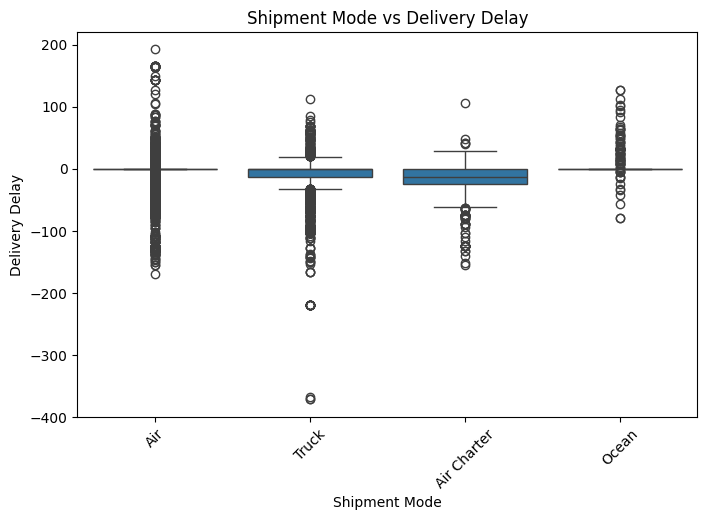

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Shipment Mode', y='Delivery Delay', data=df)
plt.xticks(rotation=45)
plt.title("Shipment Mode vs Delivery Delay")
plt.show()

# Weight vs Freight Cost

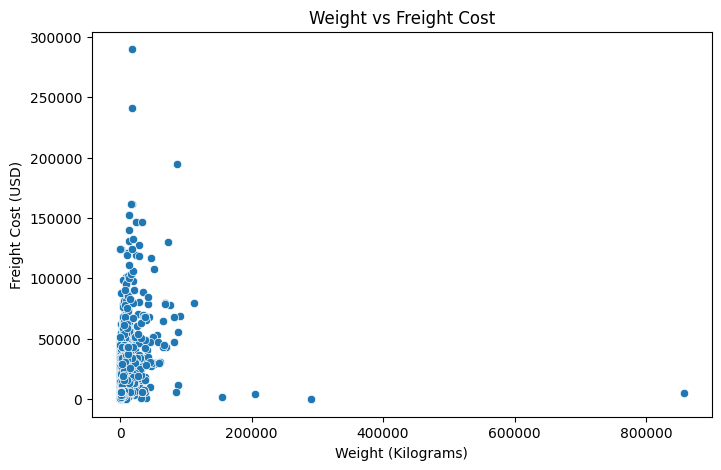

In [19]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Weight (Kilograms)', y='Freight Cost (USD)', data=df)
plt.title("Weight vs Freight Cost")
plt.show()

# Correlation Heatmap

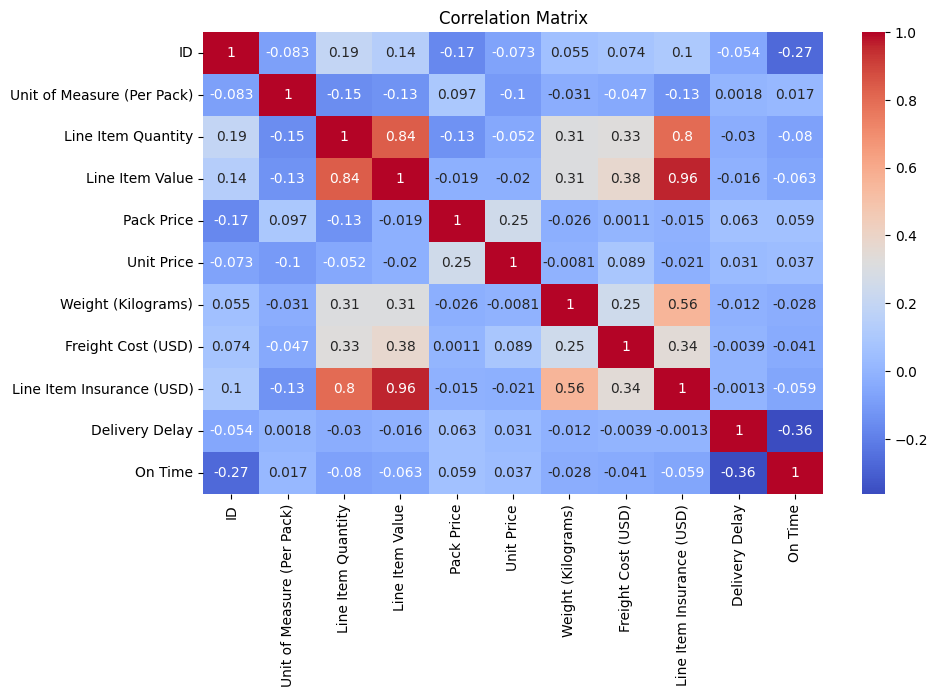

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Top Countries by Delay

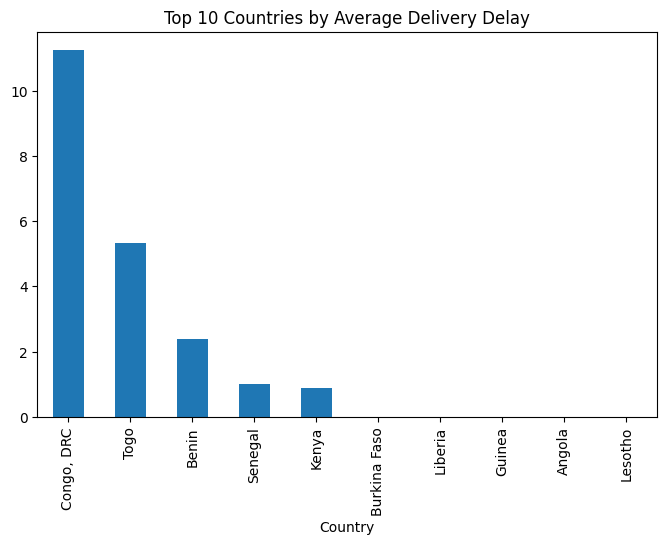

In [21]:
country_delay = df.groupby('Country')['Delivery Delay'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
country_delay.plot(kind='bar')
plt.title("Top 10 Countries by Average Delivery Delay")
plt.show()

### Observation

Air shipment shows lower median delivery delay compared to sea shipment.
This suggests better performance for time-sensitive deliveries.

# Vendor Performance

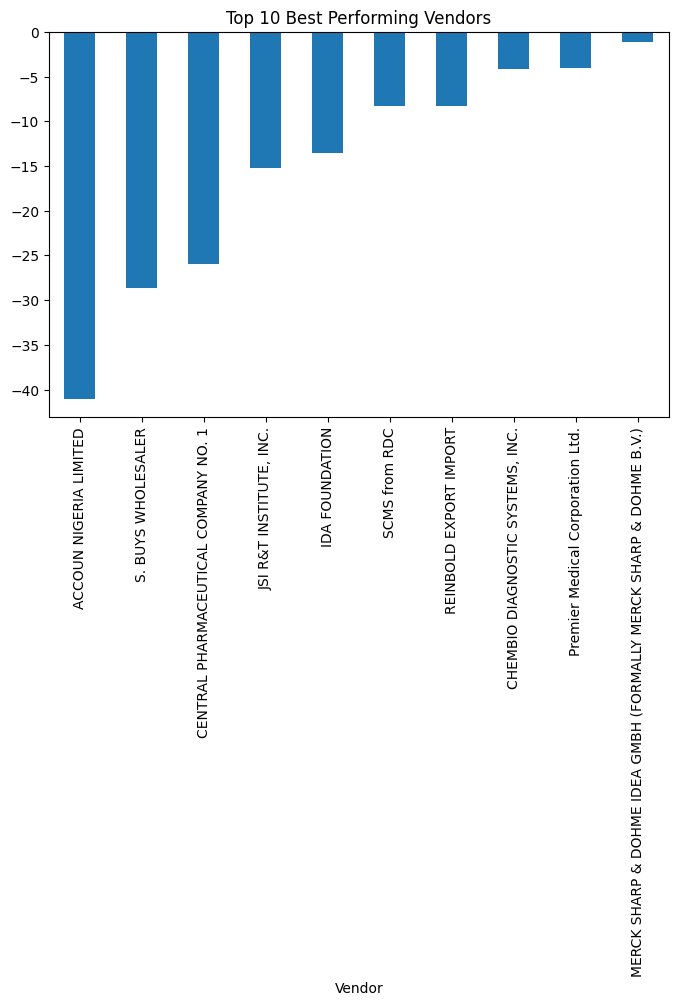

In [22]:
vendor_delay = df.groupby('Vendor')['Delivery Delay'].mean().sort_values().head(10)

plt.figure(figsize=(8,5))
vendor_delay.plot(kind='bar')
plt.title("Top 10 Best Performing Vendors")
plt.show()

## Key Business Insights

• Shipment mode significantly impacts delivery performance.
• Freight cost is positively correlated with shipment weight.
• Vendor efficiency varies across suppliers.
• Certain countries show higher average delays.

## Recommendations

• Use air shipment for urgent deliveries.
• Monitor vendors with consistent delays.
• Optimize shipment weight to reduce freight costs.
• Investigate high-delay countries for process improvement.

# Final Conclusion

## Conclusion

The analysis reveals that shipment mode and vendor selection significantly impact delivery performance.
Freight cost increases with shipment weight.
Certain countries and vendors show higher average delivery delays.
Improving shipment planning and vendor monitoring can enhance operational efficiency and reduce costs.